In [1]:
## Regression - Supervised learning ......target variable is present

In [2]:
#Linear Regression

In [3]:
import seaborn as sns
import pandas as pd
import numpy as np

In [4]:
df=sns.load_dataset('tips')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [5]:
#y=mx+c

##### Regression - use data to identify relationships among variables and use these relationships to make predictions

In [6]:
#Diff b/w correlation and regression

##correlation - used to describe the degree to which one variable is linearly related to another. you get how strong the relationship is or strength of relationship

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

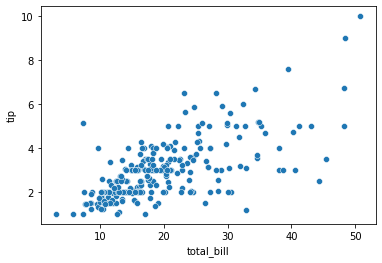

In [7]:
sns.scatterplot(data=df,x='total_bill',y='tip')

- y=mx+c actual
- y^=mx+c predicted

In [8]:
#y^-y=error

In [9]:
#ML - optimization (minimization / maximization)

In [10]:
##Cost Function - sum((error)^2) - sum of squared errors - 0.3 - minimize the error
## We are trying to optimize the cost function by finding the optimal values of m and c
## this is the function that describes the error of the model's prediction from the true values.
##In linear reg - cost function as sum of squared errors, mean of squared errors, mean absolute error

In [11]:
##SSE - sum of squared errors = sum((y-y^)^2)

In [12]:
##Model Parameter - y=Bo+B1x1......naming convention - betas,coefficients,m=slop,c=y intercept

In [13]:
##Gradient descent Algorithum ----   random values of m and c

##### It starts with random values for the model parameters and keep on updating them such that the cost function is minimized

In [14]:
#actual y =bo+b1x mx+c m= slop, c= y intercept .....betas 

In [15]:
#predicted y= bo+b1x1+b2x2+b3x3..... multiple linear regression

#### Model try to create multiple lines and then try to find which line gives the least error that line is called best fit line

In [16]:
## Business problem - predict tips based on other features in the data set

In [17]:
#y variable - tip - target variable - dependent variable
#X variables - 'total_bill', 'sex', 'smoker', 'day', 'time', 'size' - independent variables

In [18]:
## when to use linear regression

## Target variable is continous in nature...so we can use linear regression

In [19]:
#EDA

In [20]:
#Shape

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [22]:
## 5 point summary 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [23]:
## Missing value Check

In [24]:
## decide whether to impute or drop the missing values

## if column has outlier we impute the missing values by median
## if column does not have outlier we impute the missing values by mean

In [25]:
## Univariate analysis

In [26]:
## bivariate analysis

In [27]:
## Outlier treatment

# iqr=q3-q1
#lower cutoff = q1-1.5iqr
#upper cutoff = q3+1.5iqr

##use .clip(lower= lower cutoff,upper= upper cutoff) to clip the data

In [28]:
# Encoding - categorical data cannot be driectly put as input into our algorithum

#- label encoding
#- one hot encoding / dummy variable creation

In [29]:
df.time.unique()

['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']

In [30]:
## one hot encoding ## if we have n distinct categories in a column then we need n-1 dummy variables
df_cat=pd.get_dummies(df.select_dtypes('category'),drop_first=True)

In [31]:
df_cat

,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,True,True,False,False,True,True
1,False,True,False,False,True,True
2,False,True,False,False,True,True
3,False,True,False,False,True,True
4,True,True,False,False,True,True
...,...,...,...,...,...,...
239,False,True,False,True,False,True
240,True,False,False,True,False,True
241,False,False,False,True,False,True
242,False,True,False,True,False,True


In [32]:
df_num=df.select_dtypes('number')

In [33]:
df_num

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4
...,...,...,...
239,29.03,5.92,3
240,27.18,2.00,2
241,22.67,2.00,2
242,17.82,1.75,2


In [34]:
fd=pd.concat([df_cat,df_num],axis=1)

In [35]:
fd

,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner,total_bill,tip,size
0,True,True,False,False,True,True,16.99,1.01,2
1,False,True,False,False,True,True,10.34,1.66,3
2,False,True,False,False,True,True,21.01,3.50,3
3,False,True,False,False,True,True,23.68,3.31,2
4,True,True,False,False,True,True,24.59,3.61,4
...,...,...,...,...,...,...,...,...,...
239,False,True,False,True,False,True,29.03,5.92,3
240,True,False,False,True,False,True,27.18,2.00,2
241,False,False,False,True,False,True,22.67,2.00,2
242,False,True,False,True,False,True,17.82,1.75,2


In [36]:
## spliting the data into train and test

In [37]:
#Sci-kit learn - most important package for ml

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
train_data,test_data=train_test_split(fd,test_size=0.2,random_state=1)

In [40]:
train_data

,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner,total_bill,tip,size
0,True,True,False,False,True,True,16.99,1.01,2
154,False,True,False,False,True,True,19.77,2.00,4
167,False,True,False,False,True,True,31.71,4.50,4
110,False,True,False,True,False,True,14.00,3.00,2
225,True,False,True,False,False,False,16.27,2.50,2
...,...,...,...,...,...,...,...,...,...
137,True,True,False,False,False,False,14.15,2.00,2
72,True,False,False,True,False,True,26.86,3.14,2
140,True,True,False,False,False,False,17.47,3.50,2
235,False,True,False,True,False,True,10.07,1.25,2


In [41]:
test_data

,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner,total_bill,tip,size
67,True,False,False,True,False,True,3.07,1.00,1
243,True,True,False,False,False,True,18.78,3.00,2
206,False,False,False,True,False,True,26.59,3.41,3
122,False,True,False,False,False,False,14.26,2.50,2
89,False,True,False,False,False,False,21.16,3.00,2
218,False,False,False,True,False,True,7.74,1.44,2
58,False,False,False,True,False,True,11.24,1.76,2
186,True,False,False,False,True,True,20.90,3.50,3
177,False,False,False,False,True,True,14.48,2.00,2
4,True,True,False,False,True,True,24.59,3.61,4


In [42]:
import statsmodels.formula.api as smf

In [43]:
'+'.join(list(fd.columns))

'sex_Female+smoker_No+day_Fri+day_Sat+day_Sun+time_Dinner+total_bill+tip+size'

In [44]:
formula1='tip~sex_Female+smoker_No+day_Fri+day_Sat+day_Sun+time_Dinner+total_bill+size'

#Steps -

1. create a model
2. model.fit()
3. model.predict()
4. model.summary()

In [46]:
model1=smf.ols(formula1,train_data).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     18.39
Date:                Wed, 31 Jul 2024   Prob (F-statistic):           3.75e-20
Time:                        17:18:01   Log-Likelihood:                -271.87
No. Observations:                 195   AIC:                             561.7
Df Residuals:                     186   BIC:                             591.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.6486    

In [47]:
#y=bo(intercept)+b1x1+b2x2+b3x3

In [48]:
#Ho: beta value = 0
#Ha : beta value !=0    

In [49]:
#p value critical - 0.05


#p-value - 0.597 >0.05 fail to reject the null hypothesis, this variable is insignificant
#as we fail to reject the null hypothesis that means we are saying that the beta value is close to 0 or 0 hence the variable is insignificant

In [50]:
#r-squared shows how well the data fit the regression model (the goodness of fit)

In [51]:
## r2 - 48% y is explained by x variables

In [52]:
formula2='tip~total_bill+size'

In [53]:
model2=smf.ols(formula2,train_data).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     74.26
Date:                Wed, 31 Jul 2024   Prob (F-statistic):           1.29e-24
Time:                        17:18:04   Log-Likelihood:                -272.82
No. Observations:                 195   AIC:                             551.6
Df Residuals:                     192   BIC:                             561.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7666      0.206      3.717      0.0

In [54]:
#r2 
#y  x1     r2 50%
#y x1 x2 r2 75%

#adjusted r2 - penalises the r2 for every variable added to the equation basis whether the variable is significant or not

In [55]:
#~diff between r2 and adjusted r2 should not be more than 5%...if it is more than 5 % then remove insifnicant variables

In [56]:
train_predict=model2.predict()
test_predict=model2.predict(test_data)

In [57]:
train_data['Prediction']=train_predict
test_data['Prediction']=test_predict

In [58]:
test_data

,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner,total_bill,tip,size,Prediction
67,True,False,False,True,False,True,3.07,1.00,1,1.258789
243,True,True,False,False,False,True,18.78,3.00,2,2.733523
206,False,False,False,True,False,True,26.59,3.41,3,3.594191
122,False,True,False,False,False,False,14.26,2.50,2,2.382184
89,False,True,False,False,False,False,21.16,3.00,2,2.918521
218,False,False,False,True,False,True,7.74,1.44,2,1.875385
58,False,False,False,True,False,True,11.24,1.76,2,2.147439
186,True,False,False,False,True,True,20.90,3.50,3,3.151907
177,False,False,False,False,True,True,14.48,2.00,2,2.399285
4,True,True,False,False,True,True,24.59,3.61,4,3.692327


In [59]:
import os
os.getcwd()

'C:\\Users\\Pooja'

In [60]:
train_data[['tip','Prediction']].to_excel('model_prediction.xlsx')

In [61]:
##Linear Regression

#Dataset - target is continuous in nature
# variables follow linear relationship 
## draw a line through them


#input - historical dataset
#o/p - predict


#train - test split

### y=mx +c
#### y= m1x1+m2x2....+c

####  line which will give you the least error is called best fit line

#### random m and c values.....m1,c1, y^1.....y-y^=e...error is a squared squared term....parabole
#### Gradient descent algorithum....
##### using gradient decent algorithum you get m optimal and c optimal where the error is least....using these moptimal and c opyimal values you get best fit line.m

In [62]:
#Actual data point value is 10
#Model Prediction value is 6
#Mean of Actual data points is 5

#r2= SSR/SST
#SSR= 1= 6-5
#SST=5
#SSE=4
#r2 ~ 0 poor fit 

#Actual data point value is 10
#Model Prediction value is 9
#Mean of Actual data points is 5

#SSR= 9-4 = 5
# SSE=10-9 =1
#SST =5

#r2~1 good fit

### Metrics

In [63]:
import sklearn.metrics as metrics

In [64]:
print(dir(metrics))

['ConfusionMatrixDisplay', 'DetCurveDisplay', 'DistanceMetric', 'PrecisionRecallDisplay', 'PredictionErrorDisplay', 'RocCurveDisplay', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_base', '_classification', '_dist_metrics', '_pairwise_distances_reduction', '_pairwise_fast', '_plot', '_ranking', '_regression', '_scorer', 'accuracy_score', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'auc', 'average_precision_score', 'balanced_accuracy_score', 'brier_score_loss', 'calinski_harabasz_score', 'check_scoring', 'class_likelihood_ratios', 'classification_report', 'cluster', 'cohen_kappa_score', 'completeness_score', 'confusion_matrix', 'consensus_score', 'coverage_error', 'd2_absolute_error_score', 'd2_log_loss_score', 'd2_pinball_score', 'd2_tweedie_score', 'davies_bouldin_score', 'dcg_score', 'det_curve', 'euclidean_distances', 'explained_variance_score', 'f1_score', 'fbeta_score', 'fowlkes_mallows_s

In [65]:
train_data.Prediction

0      2.594387
154    3.317669
167    4.245765
110    2.361974
225    2.538421
         ...   
137    2.373634
72     3.361582
140    2.631697
235    2.056495
37     2.843319
Name: Prediction, Length: 195, dtype: float64

### Train Data Metrics

In [66]:
import sklearn.metrics as metrics

In [67]:
train_data.head()

,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner,total_bill,tip,size,Prediction
0,True,True,False,False,True,True,16.99,1.01,2,2.594387
154,False,True,False,False,True,True,19.77,2.00,4,3.317669
167,False,True,False,False,True,True,31.71,4.50,4,4.245765
110,False,True,False,True,False,True,14.00,3.00,2,2.361974
225,True,False,True,False,False,False,16.27,2.50,2,2.538421


In [68]:
metrics.mean_absolute_error(train_data.tip,train_data.Prediction)

0.7363416632922368

In [69]:
metrics.mean_absolute_percentage_error(train_data.tip,train_data.Prediction)

0.28786861319298856

### Test Data Metrics

In [70]:
test_data.head()

,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner,total_bill,tip,size,Prediction
67,True,False,False,True,False,True,3.07,1.00,1,1.258789
243,True,True,False,False,False,True,18.78,3.00,2,2.733523
206,False,False,False,True,False,True,26.59,3.41,3,3.594191
122,False,True,False,False,False,False,14.26,2.50,2,2.382184
89,False,True,False,False,False,False,21.16,3.00,2,2.918521


In [71]:
metrics.mean_absolute_error(test_data.tip,test_data.Prediction)

0.7885994032628872

In [72]:
metrics.mean_absolute_percentage_error(test_data.tip,test_data.Prediction)

0.24068063499759668

#### Challenges


#### Linearity - linear regression assumes linearity so if there is no linearity in your data then don't go for linear regression

#### Outliers - As a processing step, linear regression demands that ouliers are taken care of

##### Missing values - does not work with NaN

##### linear regression assumption is x variables as independent

##### Multicollinearity -  x variables themselves are related to each other then our assumpution of x variables being independent gets violated eg - Age and Experience as age inc exp inc


###### How to detect multicollinearity


###### Variance inflation factor = VIF

#### formula = 1/ (1-r^2) if vif value is greater than 5 that means that x variable is related to other variables


###### How to we deal  with it.

##### Feature engineering - either you change the variable by combining  up thoses variables and creating new kpi's

##### or drop the related variables

##### VIF need to be checked before train and test split

###### if multicollinearlity exist then we decide on dropping or creating new kpi's

###### this step is part of your Data prepration

In [73]:
#y=m1x1+m2x2+m3x3+c

In [74]:
#r2 = R Square Formula = Explained Variation / Total Variation